# Performance Analysis of Image Processing Implementations

This notebook analyzes the performance data of different implementations (Sequential, OpenMP, MPI, and CUDA) for image processing.

In [15]:
!pip install seaborn

In [16]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

# Set the style for better visualization
plt.style.use('default')  # Changed from 'seaborn' to 'default'
plt.rcParams['figure.figsize'] = [12, 6]

In [17]:
# Load the performance data
with open('results/performance_data.json', 'r') as f:
    data = json.load(f)

# Convert the data into a more analysis-friendly format
images = []
implementations = ['sequential', 'openmp', 'mpi', 'cuda']
timings = {impl: [] for impl in implementations}

for image_name, image_data in data['images'].items():
    images.append(image_name)
    for impl in implementations:
        timings[impl].append(image_data[impl]['total'])

# Sort images by sequential time for better visualization
sorted_indices = np.argsort(timings['sequential'])
images = [images[i] for i in sorted_indices]
for impl in implementations:
    timings[impl] = [timings[impl][i] for i in sorted_indices]

## Individual Implementation Performance

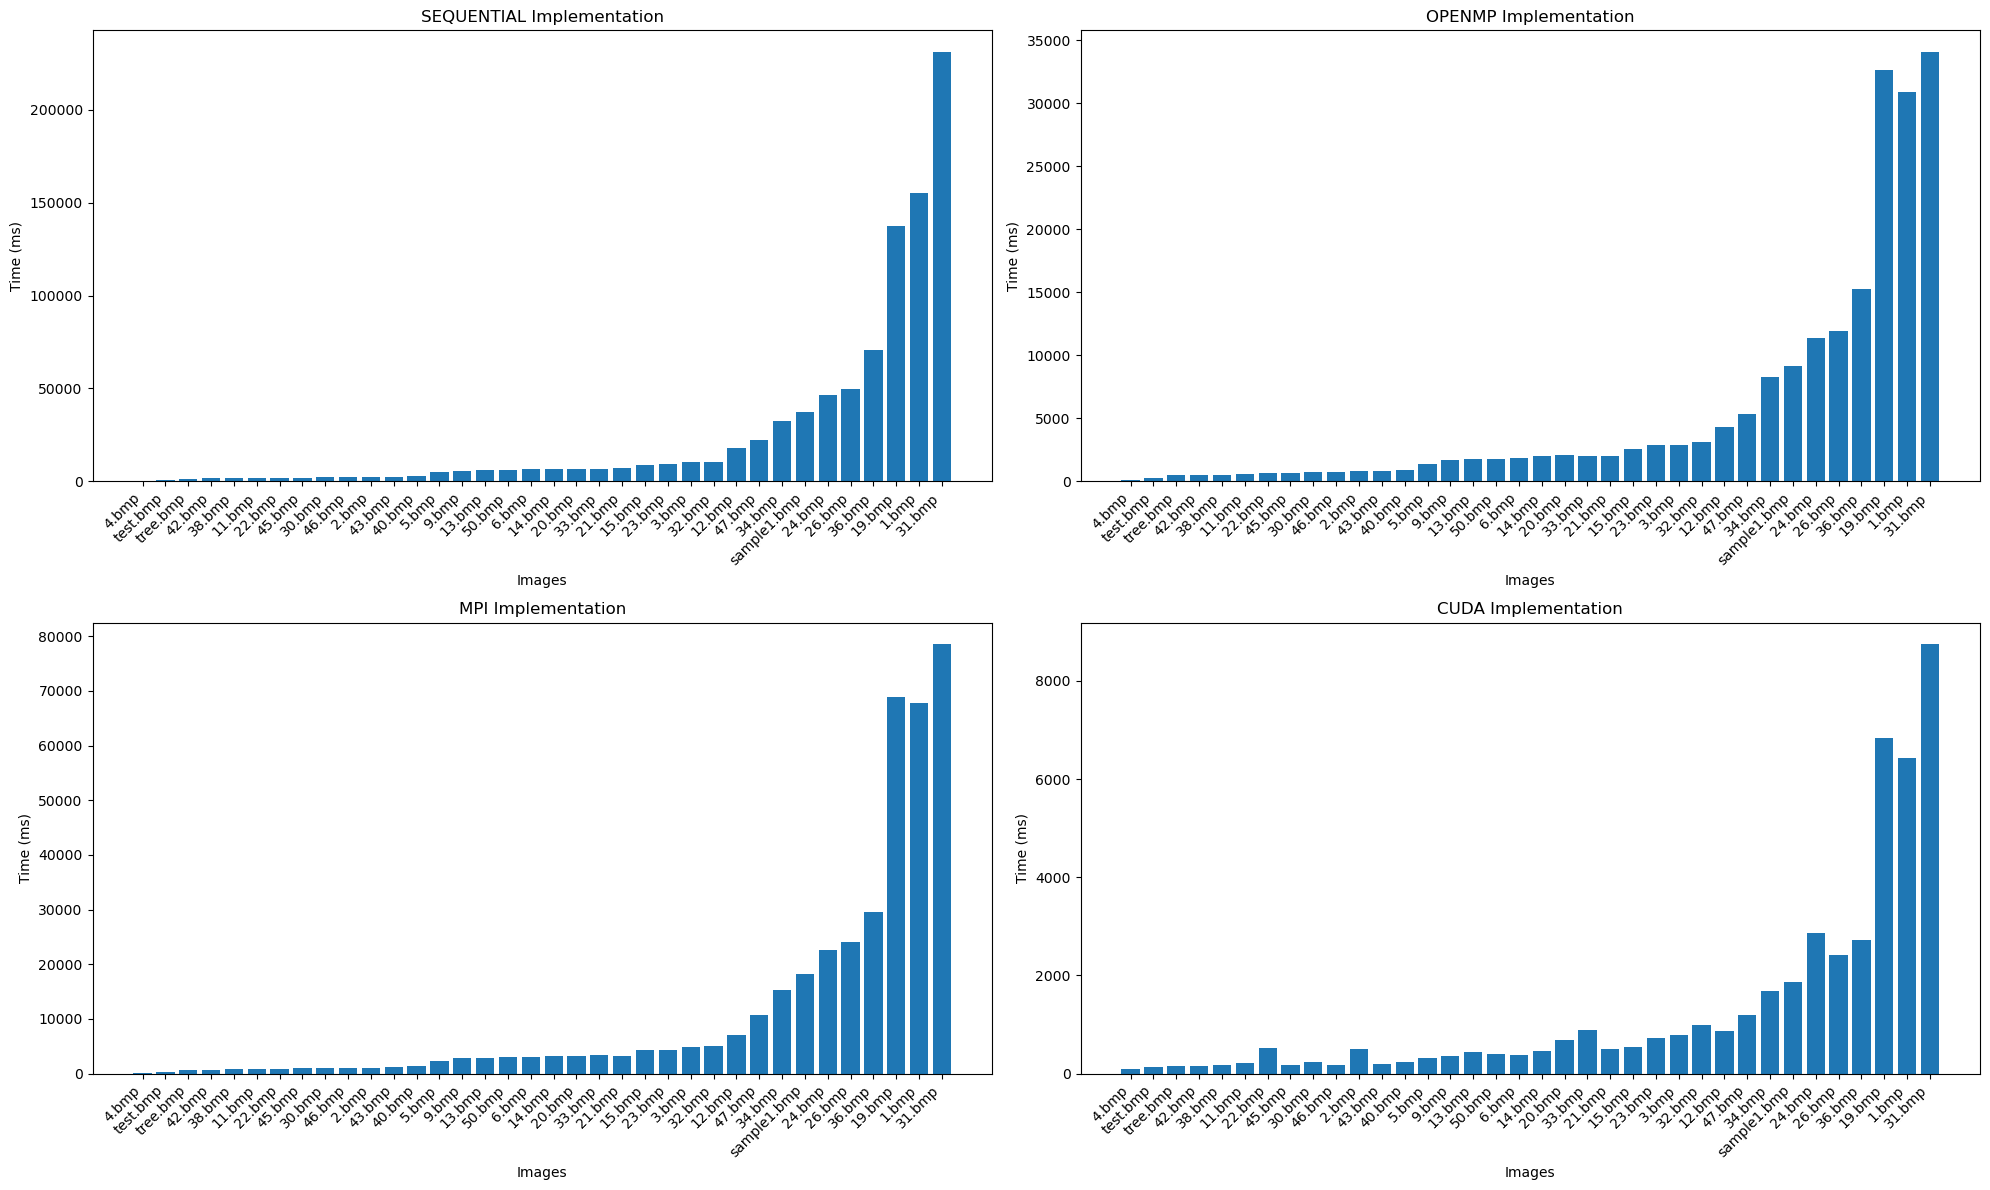

In [18]:
# Create subplots for each implementation
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

for idx, impl in enumerate(implementations):
    ax = axes[idx]
    ax.bar(images, timings[impl])
    ax.set_title(f'{impl.upper()} Implementation')
    ax.set_xlabel('Images')
    ax.set_ylabel('Time (ms)')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Combined Performance Comparison

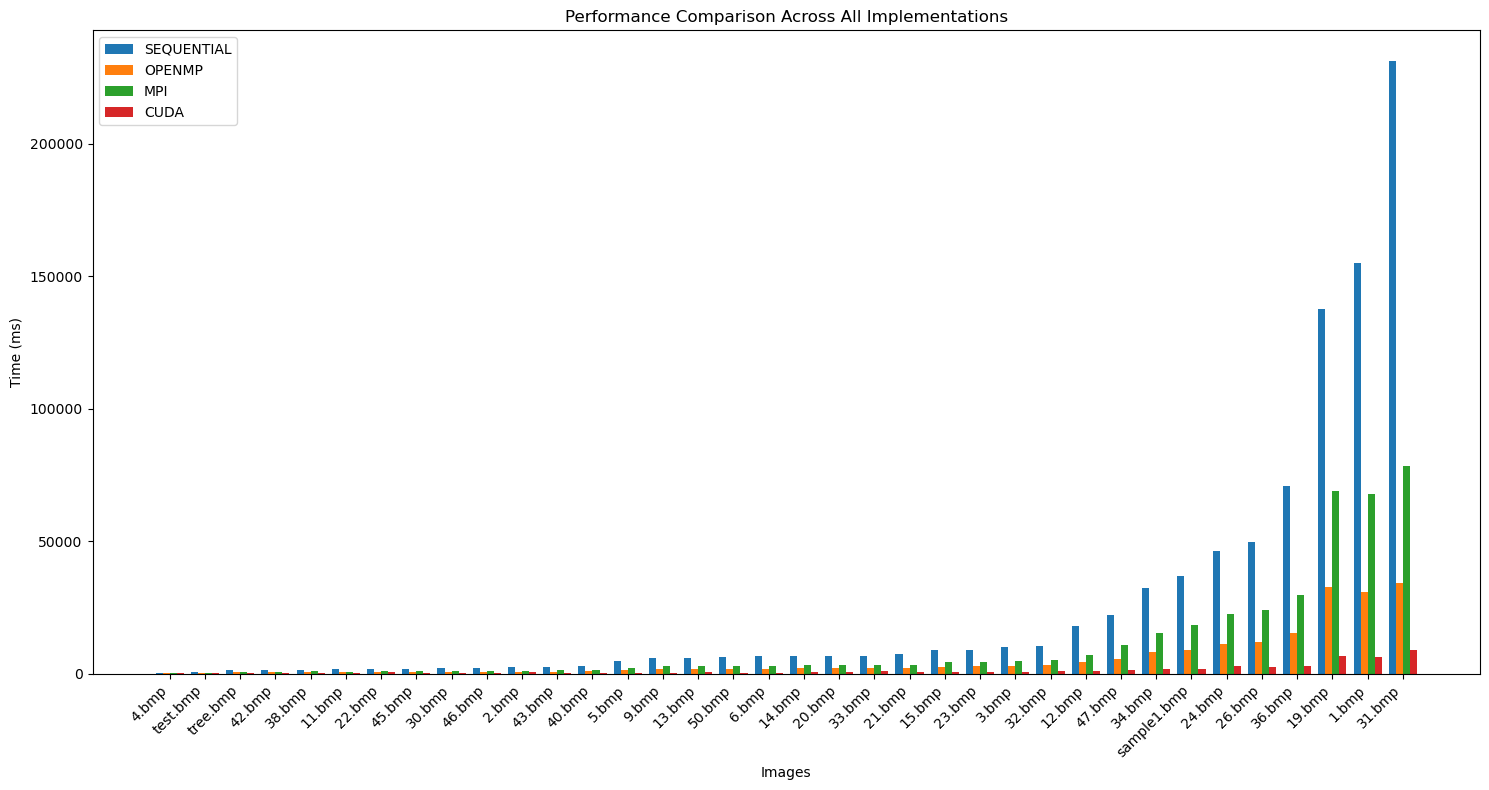

In [19]:
# Create a combined plot
plt.figure(figsize=(15, 8))

x = np.arange(len(images))
width = 0.2

for idx, impl in enumerate(implementations):
    plt.bar(x + idx*width, timings[impl], width, label=impl.upper())

plt.xlabel('Images')
plt.ylabel('Time (ms)')
plt.title('Performance Comparison Across All Implementations')
plt.xticks(x + width*1.5, images, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Speedup Analysis

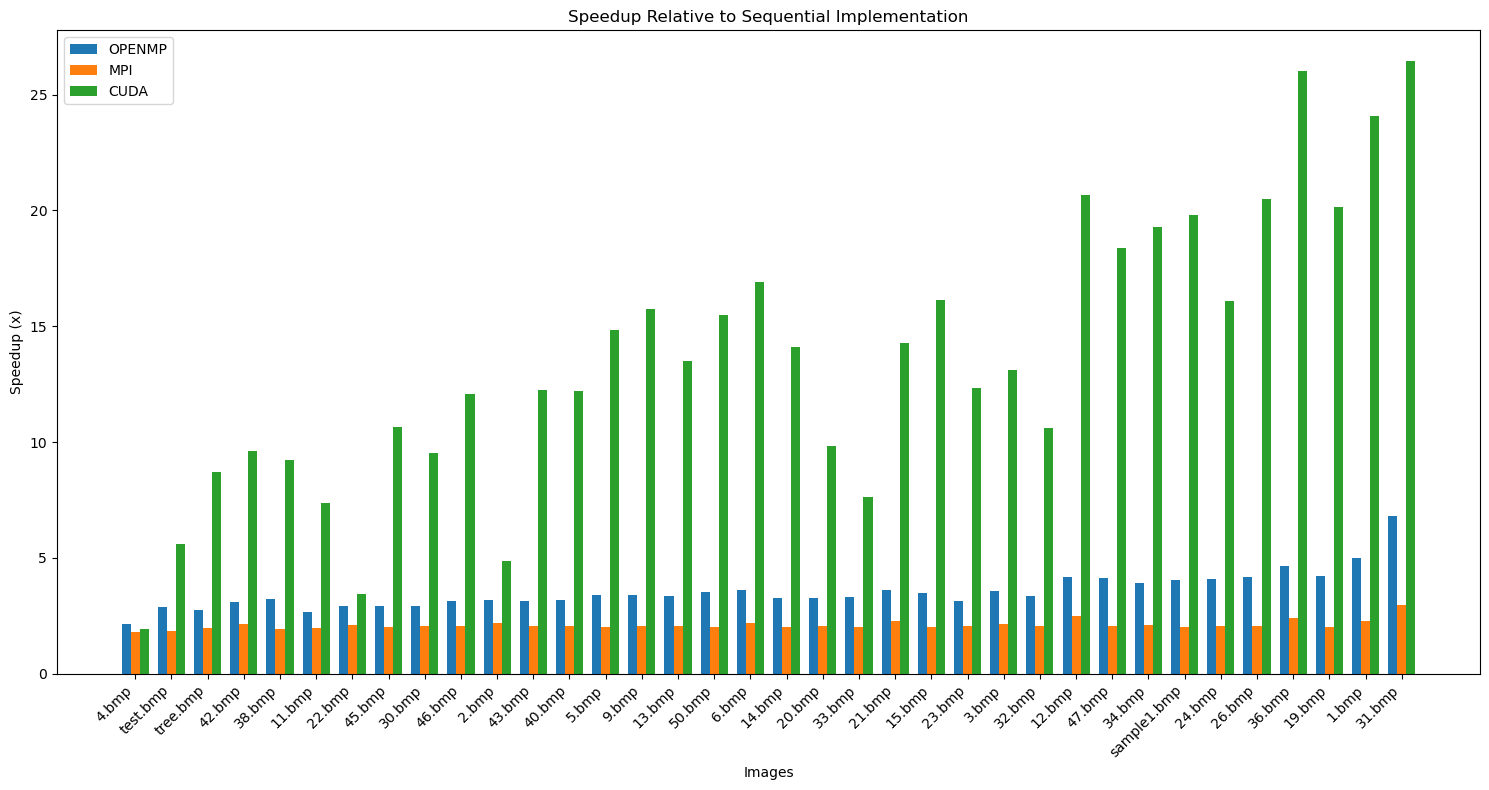

In [20]:
# Calculate speedup relative to sequential implementation
speedups = {}
for impl in ['openmp', 'mpi', 'cuda']:
    speedups[impl] = [seq/par for seq, par in zip(timings['sequential'], timings[impl])]

# Plot speedups
plt.figure(figsize=(15, 8))

x = np.arange(len(images))
width = 0.25

for idx, impl in enumerate(['openmp', 'mpi', 'cuda']):
    plt.bar(x + idx*width, speedups[impl], width, label=impl.upper())

plt.xlabel('Images')
plt.ylabel('Speedup (x)')
plt.title('Speedup Relative to Sequential Implementation')
plt.xticks(x + width, images, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Average Performance Metrics

In [21]:
# Calculate average performance metrics
avg_times = {impl: np.mean(times) for impl, times in timings.items()}
avg_speedups = {impl: np.mean(speedup) for impl, speedup in speedups.items()}

# Create a summary table
summary_data = {
    'Implementation': ['Sequential', 'OpenMP', 'MPI', 'CUDA'],
    'Average Time (ms)': [avg_times['sequential'], avg_times['openmp'], avg_times['mpi'], avg_times['cuda']],
    'Average Speedup': [1.0, avg_speedups['openmp'], avg_speedups['mpi'], avg_speedups['cuda']]
}

summary_df = pd.DataFrame(summary_data)
summary_df

,Implementation,Average Time (ms),Average Speedup
0,Sequential,25486.611111,1.000000
1,OpenMP,5516.138889,3.543281
2,MPI,11096.777778,2.100937
3,CUDA,1280.111111,13.703182
